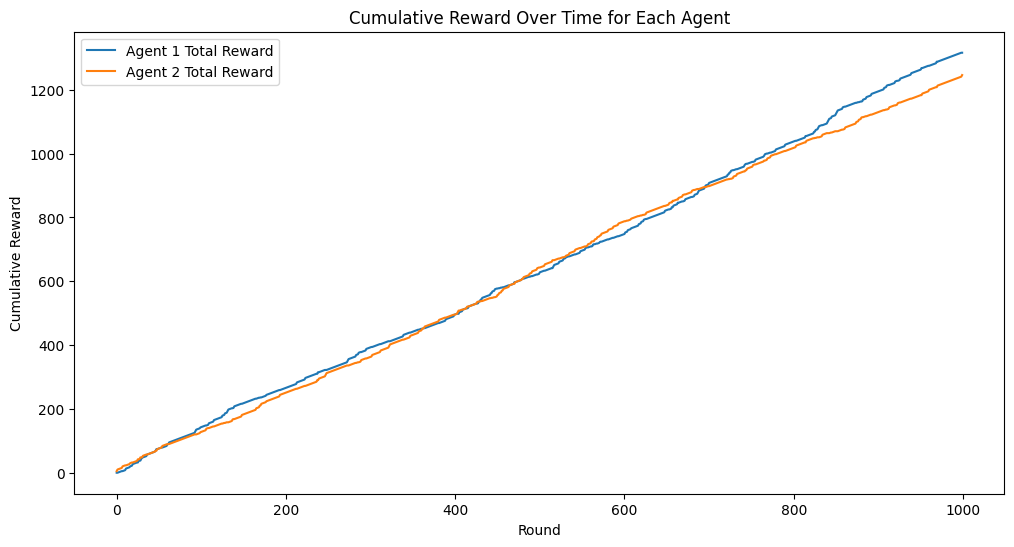

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

class PrisonersDilemma:
    def __init__(self, reward_matrix):
        self.reward_matrix = reward_matrix

    def play(self, action1, action2):
        return self.reward_matrix[action1][action2]

class Agent:
    def __init__(self, learning_rate=0.1, discount_factor=0.9, exploration_rate=0.2):
        # Параметры Q-обучения
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate

        # Q-таблица для двух действий: сотрудничество (0) и предательство (1)
        self.q_table = np.zeros(2)
        self.total_reward = 0

    def choose_action(self):
        # Эпсилон-жадный выбор действия
        if random.random() < self.exploration_rate:
            return random.choice([0, 1])  # Исследование
        return np.argmax(self.q_table)    # Эксплуатация

    def update_q_value(self, action, reward, next_action):
        # Обновление Q-значения
        best_future_q = self.q_table[next_action]
        self.q_table[action] = self.q_table[action] + self.learning_rate * (reward + self.discount_factor * best_future_q - self.q_table[action])

    def update_reward(self, reward):
        self.total_reward += reward

# Функция для симуляции игры с обучением
def simulate_game(agent1, agent2, rounds=100):
    reward_matrix = [[(3, 3), (0, 5)], [(5, 0), (1, 1)]]
    game = PrisonersDilemma(reward_matrix)

    rewards_agent1 = []
    rewards_agent2 = []

    for _ in range(rounds):
        action1 = agent1.choose_action()
        action2 = agent2.choose_action()

        reward1, reward2 = game.play(action1, action2)
        next_action1 = agent1.choose_action()
        next_action2 = agent2.choose_action()

        # Обновление Q-таблиц
        agent1.update_q_value(action1, reward1, next_action1)
        agent2.update_q_value(action2, reward2, next_action2)

        # Обновление общего вознаграждения
        agent1.update_reward(reward1)
        agent2.update_reward(reward2)

        # Логгирование наград для визуализации
        rewards_agent1.append(agent1.total_reward)
        rewards_agent2.append(agent2.total_reward)

    return rewards_agent1, rewards_agent2

# Настройка агентов и параметров
agent1 = Agent(learning_rate=0.1, discount_factor=0.9, exploration_rate=0.2)
agent2 = Agent(learning_rate=0.1, discount_factor=0.9, exploration_rate=0.2)

# Моделирование игры на 1000 раундов
rewards_agent1, rewards_agent2 = simulate_game(agent1, agent2, rounds=1000)

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(rewards_agent1, label="Agent 1 Total Reward")
plt.plot(rewards_agent2, label="Agent 2 Total Reward")
plt.xlabel("Round")
plt.ylabel("Cumulative Reward")
plt.title("Cumulative Reward Over Time for Each Agent")
plt.legend()
plt.show()
